## Step 1 – Import Required Libraries
We import the necessary Python libraries for data analysis and visualization:
- **NumPy** for numerical operations and array handling
- **Pandas** for reading CSV data and easy data manipulation
- **Matplotlib** for plotting histograms and boxplots
- **Seaborn** for advanced visualizations
- **SciPy** for statistical calculations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 – Load the NHANES Dataset
We load two datasets:
1. `nhanes_adult_male_bmx_2020.csv` – Measurements of adult males
2. `nhanes_adult_female_bmx_2020.csv` – Measurements of adult females

Both datasets contain:
1. Weight (kg)  
2. Standing height (cm)  
3. Upper arm length (cm)  
4. Upper leg length (cm)  
5. Arm circumference (cm)  
6. Hip circumference (cm)  
7. Waist circumference (cm)

The data is stored as NumPy arrays, with missing values represented as NaN.


## Step 3 – Inspect First Few Records
We display the first 5 rows of both male and female datasets to verify:
- The data is loaded correctly
- The structure (rows = participants, columns = measurements)
- Presence of NaN values indicating missing measurements



In [2]:
import numpy as np

male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",", skip_header=0)
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",", skip_header=0)

print("Male sample:", male[:5])
print("Female sample:", female[:5])


Male sample: [[  nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]]
Female sample: [[  nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]]


## Step 4 – Weight Distribution: Histograms
We plot two histograms to visualize **weight distribution**:
- Top plot: Female weights
- Bottom plot: Male weights

Both plots share the same x-axis limits to allow direct visual comparison.


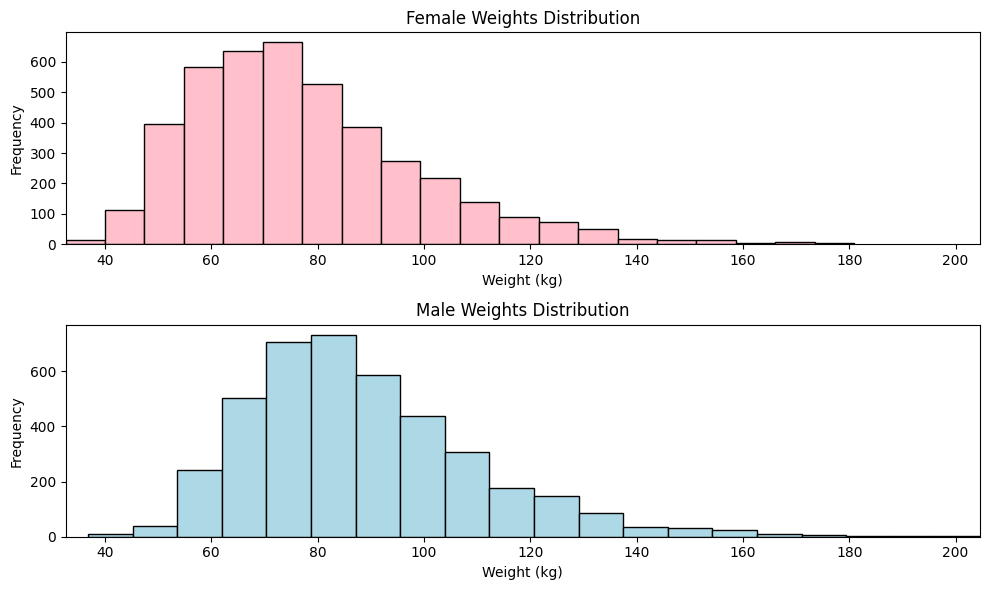

In [3]:
import matplotlib.pyplot as plt

# Extract weights (column 0) ignoring NaNs
female_weights = female[:, 0]
male_weights = male[:, 0]

# Create figure with two stacked histograms
plt.figure(figsize=(10, 6))

# Female weights histogram
plt.subplot(2, 1, 1)
plt.hist(female_weights[~np.isnan(female_weights)], bins=20, color='pink', edgecolor='black')
plt.title('Female Weights Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Male weights histogram
plt.subplot(2, 1, 2)
plt.hist(male_weights[~np.isnan(male_weights)], bins=20, color='lightblue', edgecolor='black')
plt.title('Male Weights Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Make x-axis limits the same for both
xmin = min(np.nanmin(female_weights), np.nanmin(male_weights))
xmax = max(np.nanmax(female_weights), np.nanmax(male_weights))
plt.subplot(2, 1, 1)
plt.xlim(xmin, xmax)
plt.subplot(2, 1, 2)
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()


## Step 5 – Boxplot Comparison of Weights
We use a box-and-whisker plot to compare male and female weights:
- The box shows the interquartile range (IQR)
- The line inside shows the median
- Points outside the whiskers indicate outliers

This allows us to compare the central tendency, spread, and outliers between genders.


C:\Users\balaj\AppData\Local\Temp\ipykernel_17100\3074371157.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


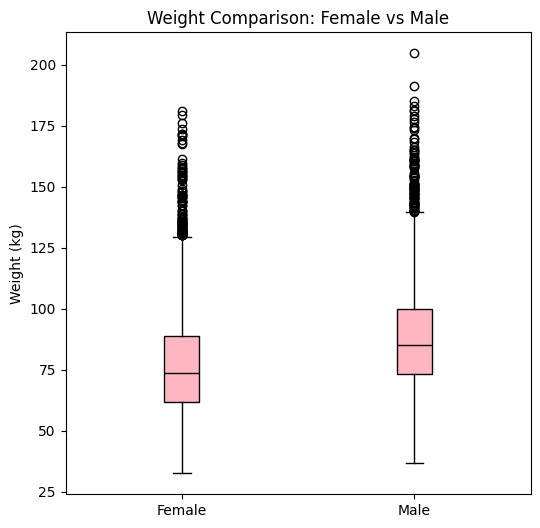

In [4]:
# Boxplot comparison
plt.figure(figsize=(6, 6))
plt.boxplot(
    [female_weights[~np.isnan(female_weights)], male_weights[~np.isnan(male_weights)]],
    labels=['Female', 'Male'],
    patch_artist=True,
    boxprops=dict(facecolor='lightpink'),
    medianprops=dict(color='black')
)

plt.title('Weight Comparison: Female vs Male')
plt.ylabel('Weight (kg)')
plt.show()


## Step 6 – Descriptive Statistics for Weights
We calculate key statistics for male and female weights:
- Mean
- Median
- Standard deviation
- Minimum and maximum values
- Skewness (symmetry of distribution)
- Kurtosis (peakedness of distribution)

These values help us understand differences between male and female weight distributions.



In [5]:
from scipy.stats import skew, kurtosis

# Remove NaN values before calculation
male_w = male_weights[~np.isnan(male_weights)]
female_w = female_weights[~np.isnan(female_weights)]

# Compute statistics
def weight_stats(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Std Dev": np.std(data),
        "Min": np.min(data),
        "Max": np.max(data),
        "Skewness": skew(data),
        "Kurtosis": kurtosis(data)
    }

male_stats = weight_stats(male_w)
female_stats = weight_stats(female_w)

print("Male Weight Statistics:")
for k, v in male_stats.items():
    print(f"{k}: {v:.2f}")

print("\nFemale Weight Statistics:")
for k, v in female_stats.items():
    print(f"{k}: {v:.2f}")



Male Weight Statistics:
Mean: 88.36
Median: 85.00
Std Dev: 21.42
Min: 36.80
Max: 204.60
Skewness: 0.98
Kurtosis: 1.47

Female Weight Statistics:
Mean: 77.40
Median: 73.60
Std Dev: 21.54
Min: 32.60
Max: 180.90
Skewness: 1.03
Kurtosis: 1.40


## Step 7 – Adding BMI Column to Female Dataset

We add BMI as an **8th column** to the female dataset.  
This allows further analysis of weight relative to height.



In [6]:
# Extract weight (kg) and height (cm)
female_weight = female[:, 0]
female_height_cm = female[:, 1]

# Convert height to meters
female_height_m = female_height_cm / 100

# Calculate BMI (ignore NaNs automatically)
female_bmi = female_weight / (female_height_m ** 2)

# Add BMI as new column (8th column)
female_with_bmi = np.column_stack((female, female_bmi))

print("Shape before BMI:", female.shape)
print("Shape after BMI:", female_with_bmi.shape)

# Show first 5 rows with BMI
print("\nFirst 5 rows (with BMI):")
print(female_with_bmi[:5])


Shape before BMI: (4222, 7)
Shape after BMI: (4222, 8)

First 5 rows (with BMI):
[[         nan          nan          nan          nan          nan
           nan          nan          nan]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]]


## Step 8 – Standardizing Female Measurements
We standardize all columns of the female dataset (including BMI) using z-scores

This transformation allows comparison of measurements with different units on a common scale.


In [7]:
# Calculate z-scores for each column in female_with_bmi
zfemale = (female_with_bmi - np.nanmean(female_with_bmi, axis=0)) / np.nanstd(female_with_bmi, axis=0)

print("Shape of zfemale:", zfemale.shape)
print("\nFirst 5 rows of standardized female data:")
print(zfemale[:5])


Shape of zfemale: (4222, 8)

First 5 rows of standardized female data:
[[        nan         nan         nan         nan         nan         nan
          nan         nan]
 [ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]]


## Step 9 – Scatterplot Matrix & Correlation Analysis
We:
1. Create a scatterplot matrix (pairplot) for standardized height, weight, waist circumference, hip circumference, and BMI in females.
2. Compute:
   - **Pearson correlation coefficients** (linear relationships)
   - **Spearman correlation coefficients** (rank-based relationships)

These analyses help identify relationships between measurements.


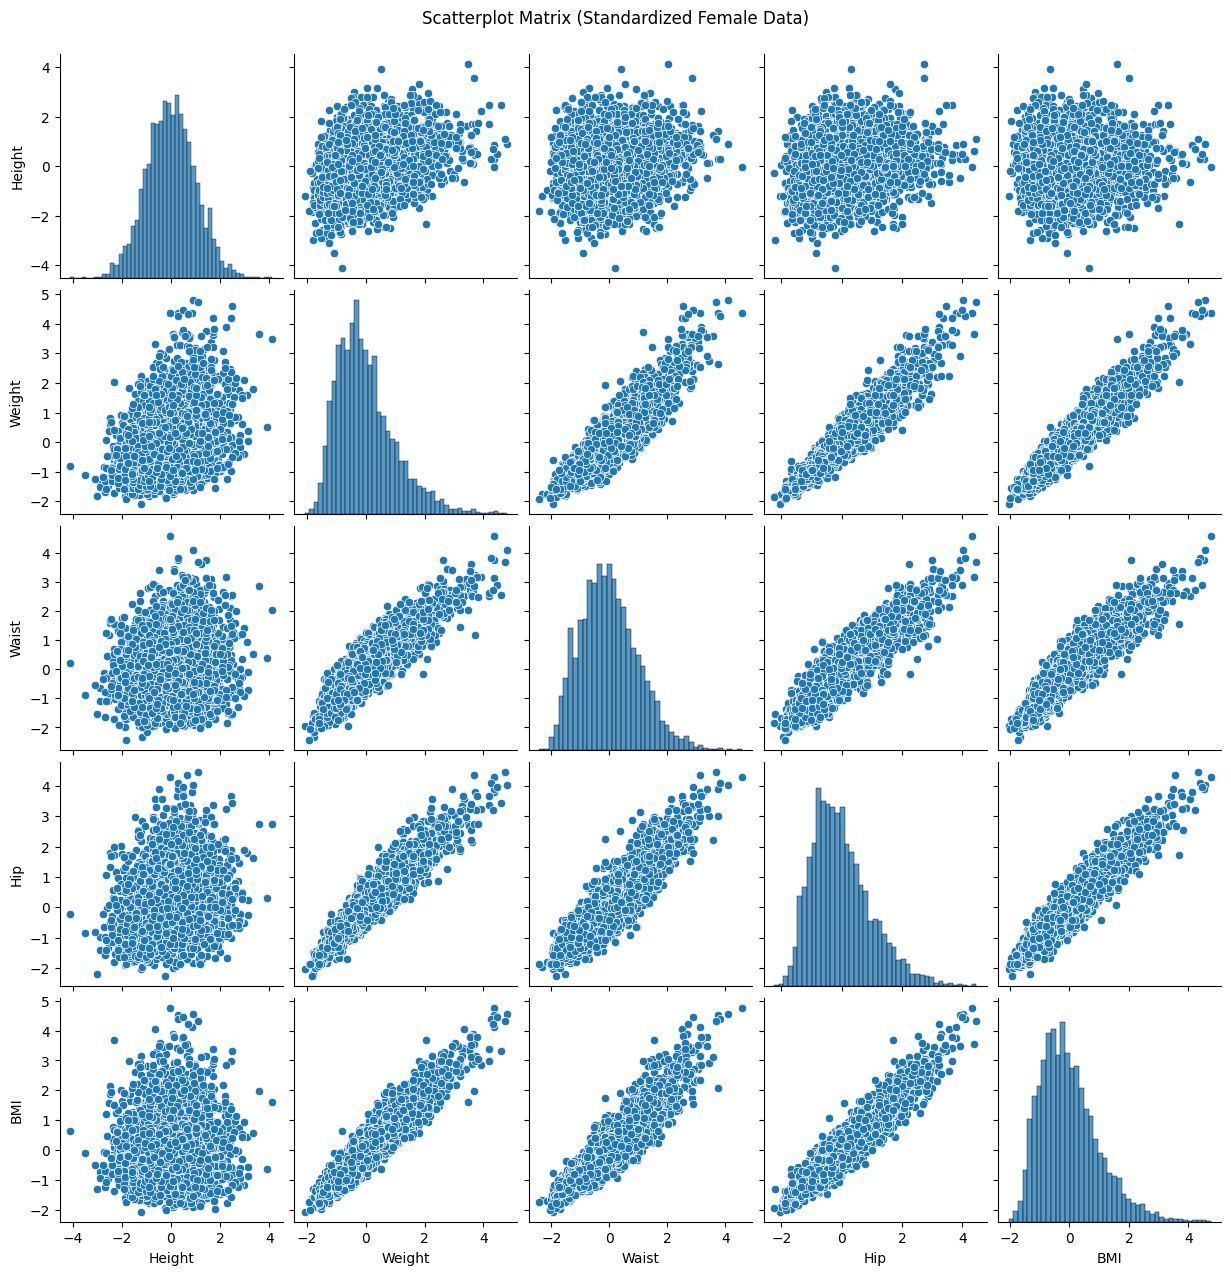


Pearson Correlation Coefficients:
           Height    Weight     Waist       Hip       BMI
Height  1.000000  0.345496  0.126547  0.202895  0.033077
Weight  0.345496  1.000000  0.904550  0.946553  0.945900
Waist   0.126547  0.904550  1.000000  0.897407  0.921198
Hip     0.202895  0.946553  0.897407  1.000000  0.944199
BMI     0.033077  0.945900  0.921198  0.944199  1.000000

Spearman Correlation Coefficients:
         Height  Weight  Waist  Hip  BMI
Height     NaN     NaN    NaN  NaN  NaN
Weight     NaN     NaN    NaN  NaN  NaN
Waist      NaN     NaN    NaN  NaN  NaN
Hip        NaN     NaN    NaN  NaN  NaN
BMI        NaN     NaN    NaN  NaN  NaN


In [8]:
import seaborn as sns
from scipy.stats import spearmanr

# Select columns: height (1), weight (0), waist (6), hip (5), BMI (7)
selected_columns = [1, 0, 6, 5, 7]
col_names = ['Height', 'Weight', 'Waist', 'Hip', 'BMI']

# Create DataFrame for easier plotting
df_zfemale = pd.DataFrame(zfemale[:, selected_columns], columns=col_names)

# Pairplot
sns.pairplot(df_zfemale)
plt.suptitle("Scatterplot Matrix (Standardized Female Data)", y=1.02)
plt.show()

# Pearson correlation
pearson_corr = df_zfemale.corr(method='pearson')
print("\nPearson Correlation Coefficients:\n", pearson_corr)

# Spearman correlation
spearman_corr, _ = spearmanr(df_zfemale)
spearman_corr_matrix = pd.DataFrame(spearman_corr, index=col_names, columns=col_names)
print("\nSpearman Correlation Coefficients:\n", spearman_corr_matrix)


## Step 10 – Waist-to-Height and Waist-to-Hip Ratios
We calculate:
- Waist-to-Height Ratio = Waist circumference / Height
- Waist-to-Hip Ratio = Waist circumference / Hip circumference

We compare male and female distributions of these ratios using a 4-box boxplot:
1. Female Waist-to-Height
2. Male Waist-to-Height
3. Female Waist-to-Hip
4. Male Waist-to-Hip


C:\Users\balaj\AppData\Local\Temp\ipykernel_17100\2709140144.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


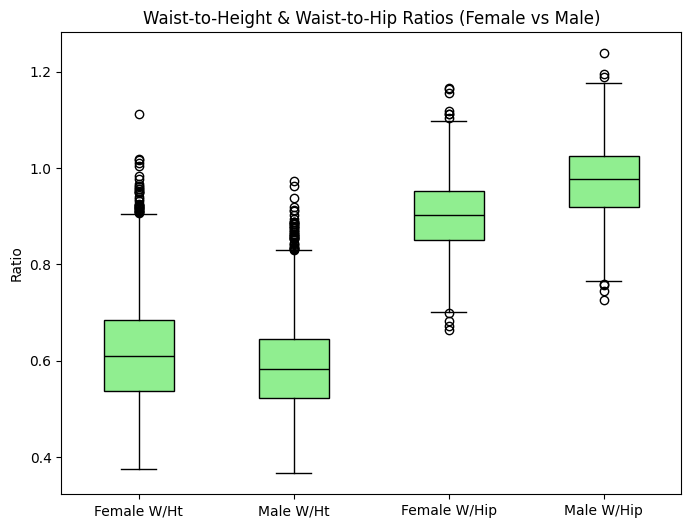

In [9]:
# --- Add ratios to male dataset ---
male_waist = male[:, 6]
male_height = male[:, 1]
male_hip = male[:, 5]

male_wth_ratio = male_waist / male_height      # Waist-to-Height
male_wthip_ratio = male_waist / male_hip       # Waist-to-Hip

# --- Add ratios to female dataset ---
female_waist = female[:, 6]
female_height = female[:, 1]
female_hip = female[:, 5]

female_wth_ratio = female_waist / female_height
female_wthip_ratio = female_waist / female_hip

# --- Boxplot for comparison ---
plt.figure(figsize=(8, 6))
plt.boxplot(
    [
        female_wth_ratio[~np.isnan(female_wth_ratio)],
        male_wth_ratio[~np.isnan(male_wth_ratio)],
        female_wthip_ratio[~np.isnan(female_wthip_ratio)],
        male_wthip_ratio[~np.isnan(male_wthip_ratio)]
    ],
    labels=['Female W/Ht', 'Male W/Ht', 'Female W/Hip', 'Male W/Hip'],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen'),
    medianprops=dict(color='black')
)

plt.title('Waist-to-Height & Waist-to-Hip Ratios (Female vs Male)')
plt.ylabel('Ratio')
plt.show()



## Step 11 – Lowest and Highest BMI Cases (Standardized)
We identify:
- The **5 participants with the lowest BMI**
- The **5 participants with the highest BMI**  
(from the female dataset)

We then display their **standardized measurements** from the `zfemale` dataset.  

This allows us to:
- Examine patterns among those with extremely low or high BMI
- Observe differences in height, weight, waist, and hip measurements between these two groups


In [10]:
# Column index for BMI in female_with_bmi and zfemale
bmi_col_index = 7  # in female_with_bmi, BMI is the 8th column (index 7)

# Get BMI column (non-standardized) for sorting
female_bmi = female_with_bmi[:, bmi_col_index]

# Sort indices by BMI (ignoring NaN values)
sorted_indices = np.argsort(female_bmi)

# Remove indices where BMI is NaN
sorted_indices = [i for i in sorted_indices if not np.isnan(female_bmi[i])]

# Select 5 lowest and 5 highest BMI indices
lowest_indices = sorted_indices[:5]
highest_indices = sorted_indices[-5:]

# Extract rows from standardized dataset
lowest_bmi_std = zfemale[lowest_indices]
highest_bmi_std = zfemale[highest_indices]

print("Standardized measurements - 5 Lowest BMI:")
print(lowest_bmi_std)

print("\nStandardized measurements - 5 Highest BMI:")
print(highest_bmi_std)


Standardized measurements - 5 Lowest BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Standardized measurements - 5 Highest BMI:
[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36

## Step 12 – Conclusion
This project applied NumPy, Pandas, Matplotlib, and Seaborn to analyze NHANES 2020 anthropometric data.  
We visualized distributions, computed BMI and ratio-based measures, and compared male and female body measurements.  

Key takeaways:
- Males generally have higher median weights and waist-to-height ratios.
- BMI alone can be misleading, especially for muscular individuals.
- Ratio-based measures (waist-to-height, waist-to-hip) add valuable insights into fat distribution and health risk.

**Final Note:**  
For accurate health assessments, BMI should be combined with waist-to-height and waist-to-hip ratios rather than used in isolation.
